# Preparation for session 3

In this review, we will discuss the definition of functions in Python. The flexible handling of arguments can be especially helpful.

We'll also further explore the possibilities of data analysis on the database of trees in Eindhoven.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Functions

In Python, functions are defined by the keyword `def`, followed by the call signature (`root(x, y=2)` in this case) and an indented code block.

The return values are indicated by the keyword `return`. If no return values are indicated, or if the return keyword is ommitted completely, the function will return `None`.

In the following example the code block only contains the return statement:

In [2]:
def root(radicant, index=2):
    return radicant**(1/index)

The second argument (`index=2`) has a default value. If no second argument is given, it will keep its default value:

In [3]:
root(4)

2.0

In [4]:
root(27, 3)

3.0

You can also pass the arguments as keyword arguments, so you don't have to rely on the order by which the function expects them. 

Even when you don't need to, this can make your code more readable:

In [ ]:
root(index=4, radicant=256)

A string right after the function definition is called a 'docstring'. The docstring is typically defined within triple doublequotes `"""`This is the docstring`"""`.

The docstring should always contain a brief description of what the function does:

In [5]:
def root(radicant, index=2):
    """
    calculate root of number `radicant`
    default is square root
    """
    return radicant**(1/index)

You can read the docstring:
* when you start typing the function call `root(` and then press <key> <kbd>tab</kbd>.
* by calling the function `help`:

In [6]:
help(root)

Help on function root in module __main__:

root(radicant, index=2)
    calculate root of number `radicant`
    default is square root



## Arbitrary number of arguments

Some functions can take an arbitary number of arguments:

In [7]:
print(1, 2, 3, 4, 5, 6, 7, 8, 9, sep='; ')

1; 2; 3; 4; 5; 6; 7; 8; 9


In [8]:
list(zip([1, 2], [3, 4], [5, 6], [7, 8]))

[(1, 3, 5, 7), (2, 4, 6, 8)]

This appears to be hard to use when you have your data in the form of some collection, e.g.: 

In [11]:
# this might seem to produce an unexpected output.
# here 'L' is processed as a single entry.
L = [1, 2, 3, 4, 5, 6, 7, 8, 9]
print(L, sep='; ')

[1, 2, 3, 4, 5, 6, 7, 8, 9]


You can enter the elements of your collection as if they were separate arguments using an `*`:

In [3]:
# here the elements of 'L' are processed separately 
print(*L, sep='; ')

1; 2; 3; 4; 5; 6; 7; 8; 9


You will find that the function `zip` is much more useful if you understand this use of `*`:

In [12]:
# can you predict the output of this statement?
L = [[1, 2], [3, 4], [5, 6], [7, 8]]
print(*zip(*L), sep='; ')

(1, 3, 5, 7); (2, 4, 6, 8)


Because of the `*`, the zip function can be its own inverse!

In [13]:
L = [(1,2), (3,4), (5,6)]
Lzipped = list(zip(*L))  # same as zip([1,2], [3,4], [5,6])
Lzipped

[(1, 3, 5), (2, 4, 6)]

In [14]:
Lunzipped = list(zip(*Lzipped))  # same as zip([1,2,3], [2,4,6])
Lunzipped

[(1, 2), (3, 4), (5, 6)]

If you want to create a function that takes an arbitary number of input arguments, it is done using an `*` in the function definition, like this:

In [15]:
def print_lines(*args):
    for line in args:
        print(line)

In [16]:
print_lines('a', 1, 2, (3, 4))

a
1
2
(3, 4)


Keyword arguments can be passed from a dictionary:

In [17]:
# note the '**' prefix
kwargs = {'radicant': 10000, 'index':4}
root(**kwargs)

10.0

This can save you lots of typing:

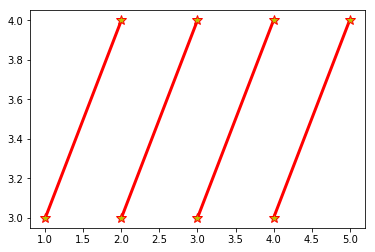

In [18]:
style = {'marker': '*', 
         'color': 'r', 
         'linewidth':3,
         'markerfacecolor':'y', 
         'markersize':10}
plt.plot([1, 2], [3, 4], **style)
plt.plot([2, 3], [3, 4], **style)
plt.plot([3, 4], [3, 4], **style)
plt.plot([4, 5], [3, 4], **style)


And a function can accept an arbitrary number of keyword arguments, which will all be gathered in a dictionary (by `**`) as follows:

In [19]:
def print_arguments(*args, **kwargs):
    print('you gave the following non-keyword arguments:')
    for i, a in enumerate(args):
        print('  argument', i, '=', a)
    print('you gave the following keyword arguments:')
    for k, v in kwargs.items():
        print(' ', k, '=', v)

print_arguments(1, 'a', [2, 3], four=4.0, large_number=13)

you gave the following non-keyword arguments:
  argument 0 = 1
  argument 1 = a
  argument 2 = [2, 3]
you gave the following keyword arguments:
  four = 4.0
  large_number = 13
